# Naive Bayes Classifier for Spam Classification

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def readMatrix(file):
    # Use the code below to read files
    fd = open(file, 'r')
    hdr = fd.readline()
    rows, cols = [int(s) for s in fd.readline().strip().split()]
    tokens = fd.readline().strip().split()
    matrix = np.zeros((rows, cols))
    Y = []
    for i, line in enumerate(fd):
        nums = [int(x) for x in line.strip().split()]
        Y.append(nums[0])
        kv = np.array(nums[1:])
        k = np.cumsum(kv[:-1:2])
        v = kv[1::2]
        matrix[i, k] = v
    return matrix, tokens, np.array(Y)

def nb_train(matrix, category):
    # Implement your algorithm and return 
    state = {}
    N = matrix.shape[1]
     
    num_spam = np.count_nonzero(category)
    phi = num_spam / len(matrix)

    spam_idx = np.where(category == 1)[0]
    nonspam_idx = np.where(category == 0)[0]
    
    spam_matrix = matrix[spam_idx,:]
    nonspam_matrix = matrix[nonspam_idx,:]
    
    Nj_spam = np.sum(spam_matrix,axis=0)
    uj_spam = (Nj_spam + 1)/(np.sum(Nj_spam)+N)
    
    Nj_nonspam = np.sum(nonspam_matrix,axis=0)
    uj_nonspam = (Nj_nonspam + 1)/(np.sum(Nj_nonspam)+N)

    state = [phi, uj_spam, uj_nonspam]
    
    return state

def nb_test(matrix, state):
    # Classify email in the test set (each row of the document matrix) as 1 for SPAM and 0 for NON-SPAM
    output = np.zeros(matrix.shape[0])
    
    prob_spam = np.log(state[1]) + np.log(state[0])
    prob_nonspam = np.log(state[2]) + np.log(1-state[0])
    
    p_spam = matrix*prob_spam
    p_spam = np.sum(p_spam,axis=1)
    
    p_nonspam = matrix*prob_nonspam
    p_nonspam = np.sum(p_nonspam,axis=1)
    compare = np.greater(p_spam,p_nonspam)
    output = compare.astype(int)

    return output

def evaluate(output, label):
    # Use the code below to obtain the accuracy of your algorithm
    error = (output != label).sum() * 1. / len(output)
    print('Error: {:2.4f}%'.format(100*error))
    return 100*error

In [9]:
# Note1: tokenlists (list of all tokens) from MATRIX.TRAIN and MATRIX.TEST are identical
# Note2: Spam emails are denoted as class 1, and non-spam ones as class 0.
# Note3: The shape of the data matrix (document matrix): (number of emails) by (number of tokens)

# Load files
dataMatrix_train, tokenlist, category_train = readMatrix('MATRIX.TRAIN')
dataMatrix_test, tokenlist, category_test = readMatrix('MATRIX.TEST')

# Train
state = nb_train(dataMatrix_train, category_train)

# Test and evluate
prediction = nb_test(dataMatrix_test, state)
evaluate(prediction, category_test)

Error: 1.6250%


1.625

# Most Indictive Spam Tokens

In [10]:
def spam_indicative(state):
    vec = np.log(state[1]/state[2])
    ind = np.argpartition(vec, -5)[-5:]
    return ind

ind = spam_indicative(state)
print("The five words most indicative of spam are:\n",[tokenlist[i] for i in ind])

The five words most indicative of spam are:
 ['valet', 'ebai', 'unsubscrib', 'spam', 'httpaddr']


# Testing with Different Sizes of Training Data 

In [11]:
dataMatrix_test, tokenlist, category_test = readMatrix('MATRIX.TEST')
file = ['MATRIX.TRAIN.50','MATRIX.TRAIN.100','MATRIX.TRAIN.200','MATRIX.TRAIN.400',
        'MATRIX.TRAIN.800','MATRIX.TRAIN.1400']
err=[]
for filename in file:
    dataMatrix_train, tokenlist, category_train = readMatrix(filename)
    state = nb_train(dataMatrix_train, category_train)
    prediction = nb_test(dataMatrix_test, state)
    err = np.append(err,evaluate(prediction, category_test))

Error: 20.5000%
Error: 5.0000%
Error: 2.6250%
Error: 2.0000%
Error: 1.6250%
Error: 1.7500%


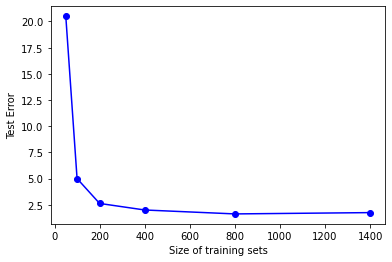

In [12]:
num =np.array([50,100,200,400,800,1400])
plt.plot(num,err,color="Blue")
plt.scatter(num,err,color="Blue")
plt.xlabel('Size of training sets')
plt.ylabel('Test Error')
plt.show()